In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
%matplotlib inline

import statsmodels.api as sm

In [389]:
df=pd.read_csv("database.csv")
df.sample(5)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
564,110705,"University of California, Santa Barbara",0,2014,19,Women's Basketball,1,3,Big West Conference,43,...,0.8235,0.8431,15,831,0.7627,0.8644,13,971,0.9412,1.0000
5531,225399,Houston Baptist University,1,2014,15,"Men's Track, Outdoor",1,2,Southland Conference,87,...,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000
301,106458,Arkansas State University,0,2014,36,Women's Volleyball,1,1,Sun Belt Conference,52,...,0.9565,0.9565,13,1000,1.0000,1.0000,13,958,1.0000,0.9167
1081,131496,Georgetown University,1,2014,11,Men's Soccer,1,2,Big East Conference,81,...,1.0000,1.0000,11,1000,1.0000,1.0000,9,1000,1.0000,1.0000
2000,155317,University of Kansas,0,2014,25,Women's Golf,1,1,Big 12 Conference,40,...,1.0000,1.0000,10,895,0.9474,0.8421,13,1000,1.0000,1.0000


In [390]:
df.columns

Index(['SCHOOL_ID', 'SCHOOL_NAME', 'SCHOOL_TYPE', 'ACADEMIC_YEAR',
       'SPORT_CODE', 'SPORT_NAME', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'NCAA_CONFERENCE', 'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE',
       'FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', '2014_ATHLETES',
       '2014_SCORE', '2014_ELIGIBILITY', '2014_RETENTION', '2013_ATHLETES',
       '2013_SCORE', '2013_ELIGIBILITY', '2013_RETENTION', '2012_ATHLETES',
       '2012_SCORE', '2012_ELIGIBILITY', '2012_RETENTION', '2011_ATHLETES',
       '2011_SCORE', '2011_ELIGIBILITY', '2011_RETENTION', '2010_ATHLETES',
       '2010_SCORE', '2010_ELIGIBILITY', '2010_RETENTION', '2009_ATHLETES',
       '2009_SCORE', '2009_ELIGIBILITY', '2009_RETENTION', '2008_ATHLETES',
       '2008_SCORE', '2008_ELIGIBILITY', '2008_RETENTION', '2007_ATHLETES',
       '2007_SCORE', '2007_ELIGIBILITY', '2007_RETENTION', '2006_ATHLETES',
       '2006_SCORE', '2006_ELIGIBILITY', '2006_RETENTION', '2005_ATHLETES',
       '2005_SCORE', '2005_ELIGIBILITY', '

In [391]:
df.drop(df[df['2004_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2005_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2006_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2007_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2008_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2009_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2010_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2011_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2012_RETENTION'] ==-99.0000].index, inplace=True)
df.drop('ACADEMIC_YEAR',axis=1,inplace=True)
df.drop('SCHOOL_TYPE',axis=1,inplace=True)
df = df.reset_index(drop=True)
df.sample(5) 

# i know this can be looped, but too lazy atm

,SCHOOL_ID,SCHOOL_NAME,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
2745,185572,Monmouth University,15,"Men's Track, Outdoor",1,2,Metro Atlantic Athletic Conference,159,978,0.9746,...,0.9636,0.9636,28,955,0.9636,0.9455,27,933,0.9039,0.9615
3477,199120,"University of North Carolina, Chapel Hill",33,Women's Tennis,1,1,Atlantic Coast Conference,33,1000,1.0000,...,1.0000,0.9375,8,1000,1.0000,1.0000,8,969,0.9375,1.0000
4839,228796,University of Texas at El Paso,15,"Men's Track, Outdoor",1,1,Conference USA,86,968,0.9427,...,0.7742,1.0000,22,885,0.7949,0.9231,20,903,0.8611,0.9444
3204,196088,"University at Buffalo, the State University of...",35,"Women's Track, Outdoor",1,1,Mid-American Conference,119,989,0.9873,...,0.9273,0.9818,30,950,0.9333,0.9667,30,966,0.9322,1.0000
2167,166027,Harvard University,9,Men's Lacrosse,1,2,The Ivy League,153,988,0.9933,...,1.0000,1.0000,32,1000,1.0000,1.0000,31,984,0.9839,0.9839


In [392]:
df['avg_scores']=df[['2014_SCORE','2013_SCORE','2012_SCORE','2011_SCORE','2010_SCORE','2009_SCORE','2008_SCORE','2007_SCORE','2006_SCORE','2005_SCORE','2004_SCORE']].mean(axis=1)
df[['NCAA_CONFERENCE','SPORT_NAME','avg_scores']]

,NCAA_CONFERENCE,SPORT_NAME,avg_scores
0,Southwestern Athletic Conference,Baseball,938.090909
1,Southwestern Athletic Conference,Football,925.181818
2,Southwestern Athletic Conference,Men's Basketball,933.363636
3,Southwestern Athletic Conference,"Men's Track, Outdoor",940.454545
4,Southwestern Athletic Conference,Women's Basketball,987.909091
...,...,...,...
5442,Big Ten Conference,Women's Swimming,975.363636
5443,Big Ten Conference,Women's Tennis,972.545455
5444,Big Ten Conference,"Women's Track, Indoor",975.909091
5445,Big Ten Conference,"Women's Track, Outdoor",977.181818


In [393]:
df['NCAA_CONFERENCE'].unique()

array(['Southwestern Athletic Conference', 'Conference USA',
       'Gulf South Conference', 'Southeastern Conference',
       'Ohio Valley Conference', 'Southern Conference',
       'Sun Belt Conference', 'Great Northwest Athletic Conference',
       'Pac-12 Conference', 'Big Sky Conference', 'Big West Conference',
       'Western Athletic Conference', 'Mountain West Conference',
       'West Coast Conference', 'Southern Collegiate Athletic Conference',
       'The Summit League', 'Northeast Conference',
       'American Athletic Conference',
       'Metro Atlantic Athletic Conference', 'America East Conference',
       'The Ivy League', 'Mid-Eastern Athletic Conference',
       'Colonial Athletic Association', 'Patriot League',
       'Atlantic 10 Conference', 'Big East Conference',
       'Atlantic Coast Conference', 'Atlantic Sun Conference',
       'Peach Belt Conference', 'Missouri Valley Conference',
       'Horizon League', 'Big Ten Conference', 'Mid-American Conference',
     

In [394]:
df[['SPORT_CODE','SPORT_NAME']].sample(50)

,SPORT_CODE,SPORT_NAME
4581,21,Women's Cross Country
3591,15,"Men's Track, Outdoor"
345,11,Men's Soccer
175,13,Men's Tennis
3887,26,Women's Gymnastics
4802,3,Men's Cross Country
4074,5,Men's Fencing
2654,29,Women's Softball
5403,6,Men's Golf
155,15,"Men's Track, Outdoor"


In [395]:
df.filter(like='ATHLETES', axis=1)

,FOURYEAR_ATHLETES,2014_ATHLETES,2013_ATHLETES,2012_ATHLETES,2011_ATHLETES,2010_ATHLETES,2009_ATHLETES,2008_ATHLETES,2007_ATHLETES,2006_ATHLETES,2005_ATHLETES,2004_ATHLETES
0,80,21,22,25,12,16,16,16,16,21,21,20
1,321,78,86,78,79,69,74,64,75,70,74,74
2,43,12,10,8,13,12,8,12,14,13,11,10
3,59,17,15,13,14,13,14,9,10,18,11,12
4,53,14,14,12,13,11,14,15,14,14,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...
5442,118,28,34,30,26,21,23,28,26,30,26,25
5443,35,10,7,9,9,8,10,8,9,10,9,9
5444,119,29,28,26,36,29,27,22,26,27,23,30
5445,118,29,28,26,35,29,27,22,26,27,23,30


In [396]:
conference=pd.DataFrame(df.groupby(['NCAA_CONFERENCE']).mean())
conference.columns

Index(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENT

In [397]:

conference.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True) 
conference

,avg_scores
NCAA_CONFERENCE,
America East Conference,973.117647
American Athletic Conference,967.552208
Atlantic 10 Conference,976.708938
Atlantic Coast Conference,979.430264
Atlantic Sun Conference,965.911157
Big 12 Conference,968.554286
Big East Conference,983.159555
Big Sky Conference,958.581439
Big South Conference,966.683712


In [400]:
sport=pd.DataFrame(df.groupby(['SPORT_NAME']).mean()) 
sport.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True) 
sport=sport.round(2)

sport.index

Index(['Baseball', 'Football', 'Men's Basketball', 'Men's Cross Country',
       'Men's Fencing', 'Men's Golf', 'Men's Gymnastics', 'Men's Ice Hockey',
       'Men's Lacrosse', 'Men's Skiing', 'Men's Soccer', 'Men's Swimming',
       'Men's Tennis', 'Men's Track, Indoor', 'Men's Track, Outdoor',
       'Men's Volleyball', 'Men's Water Polo', 'Men's Wrestling',
       'Mixed Rifle', 'Women's Basketball', 'Women's Bowling',
       'Women's Cross Country', 'Women's Fencing', 'Women's Field Hockey',
       'Women's Golf', 'Women's Gymnastics', 'Women's Ice Hockey',
       'Women's Lacrosse', 'Women's Rowing', 'Women's Skiing',
       'Women's Soccer', 'Women's Softball', 'Women's Swimming',
       'Women's Tennis', 'Women's Track, Indoor', 'Women's Track, Outdoor',
       'Women's Volleyball', 'Women's Water Polo'],
      dtype='object', name='SPORT_NAME')

AttributeError: 'DataFrame' object has no attribute 'box'

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

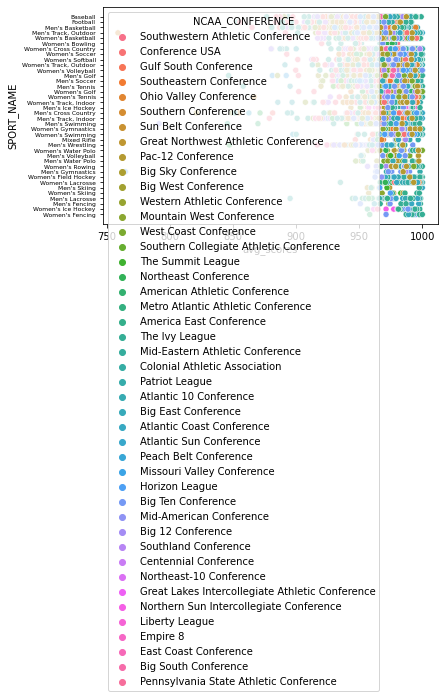

In [386]:
sns.scatterplot(data=df,y='SPORT_NAME',x="avg_scores",hue='NCAA_CONFERENCE')
plt.yticks(size=6)

In [319]:
df['avg_scores'].min()

758.9090909090909

# Hi Jack